In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv


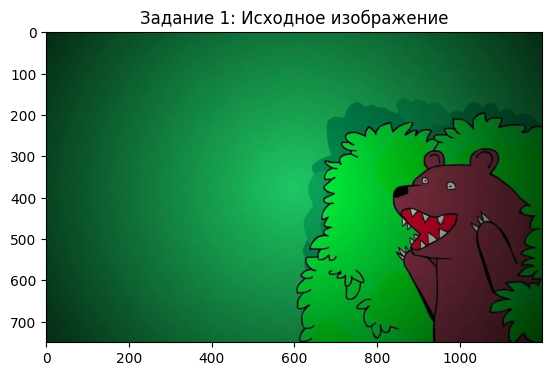

In [2]:
#Задание 1
image_path = "img.png"
img = cv.imread(image_path)
plt.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
plt.title("Задание 1: Исходное изображение")
plt.show()

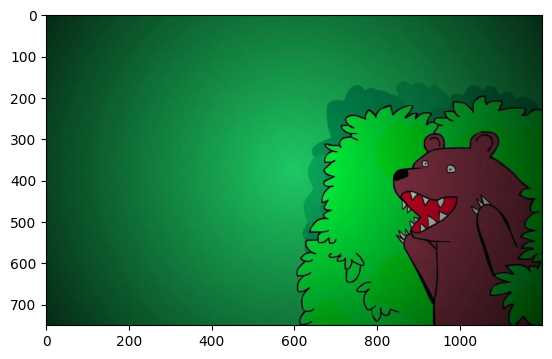

In [4]:
#Задание 2
def load_image(filename=None):
    if filename is None:
        print("Пожалуйста, укажите файл изображения.")
        return None
    else:
        img = cv.imread(filename)
        return img

# Использование функции
img = load_image(image_path)
plt.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))


In [5]:
#Задание 3
def check_image_properties(img):
    if img is not None:
        print(f"Размер изображения: {img.shape}")
        print(f"Тип данных изображения: {img.dtype}")
    else:
        print("Ошибка загрузки изображения")

# Проверка свойств изображения
check_image_properties(img)


Размер изображения: (750, 1200, 3)
Тип данных изображения: uint8


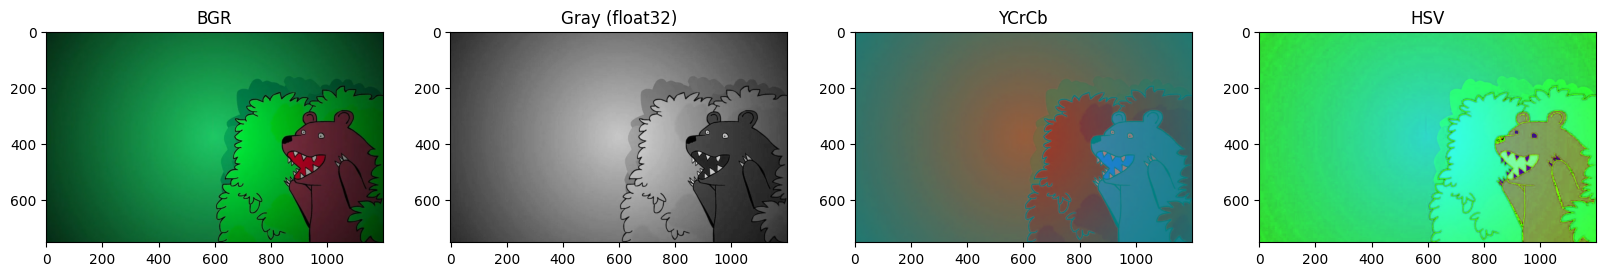

In [6]:
#Задание 4
# Преобразование в разные цветовые пространства
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY).astype(np.float32)
img_bgr = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img_ycrcb = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# Вывод изображений
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img_bgr)
ax[0].set_title('BGR')
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Gray (float32)')
ax[2].imshow(img_ycrcb)
ax[2].set_title('YCrCb')
ax[3].imshow(img_hsv)
ax[3].set_title('HSV')
plt.show()


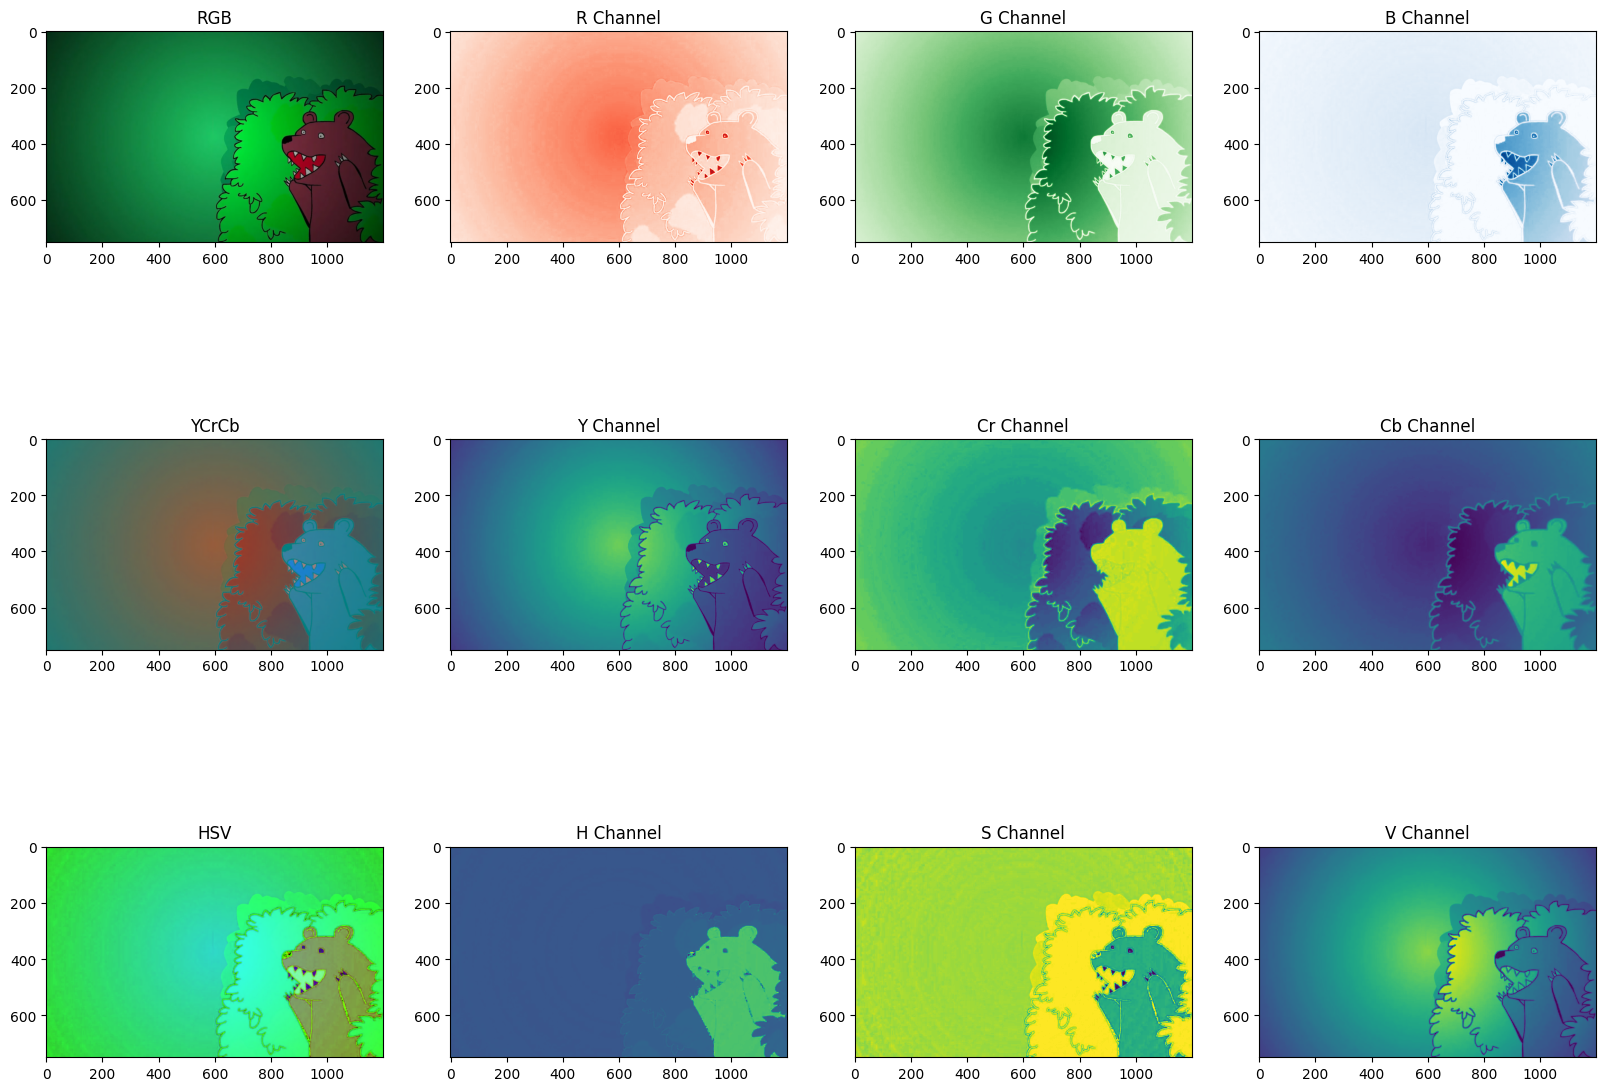

In [7]:
# Разбиваем изображения на каналы
r, g, b = cv.split(img)
y, cr, cb = cv.split(img_ycrcb)
h, s, v = cv.split(img_hsv)

# Вывод каналов
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

# Первая строка: RGB
ax[0, 0].imshow(img_bgr)
ax[0, 0].set_title("RGB")
ax[0, 1].imshow(r, cmap='Reds')
ax[0, 1].set_title("R Channel")
ax[0, 2].imshow(g, cmap='Greens')
ax[0, 2].set_title("G Channel")
ax[0, 3].imshow(b, cmap='Blues')
ax[0, 3].set_title("B Channel")

# Вторая строка: YCrCb
ax[1, 0].imshow(img_ycrcb)
ax[1, 0].set_title("YCrCb")
ax[1, 1].imshow(y)
ax[1, 1].set_title("Y Channel")
ax[1, 2].imshow(cr)
ax[1, 2].set_title("Cr Channel")
ax[1, 3].imshow(cb)
ax[1, 3].set_title("Cb Channel")

# Третья строка: HSV
ax[2, 0].imshow(img_hsv)
ax[2, 0].set_title("HSV")
ax[2, 1].imshow(h)
ax[2, 1].set_title("H Channel")
ax[2, 2].imshow(s)
ax[2, 2].set_title("S Channel")
ax[2, 3].imshow(v)
ax[2, 3].set_title("V Channel")

plt.show()


### Лабораторная работа №2

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Загрузка изображения
image_path = "shrek.jpg"
image = cv.imread(image_path)

# Определение типа изображения
def is_color_image(img):
    return img.shape[2] == 3 if len(img.shape) == 3 else False

print("Тип изображения:", "Полноцветное" if is_color_image(image) else "Полутоновое")

# Преобразование в полутоновое изображение и тип double
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_double = np.double(image_gray)
plt.imshow(image_gray, cmap="gray")
plt.title("Полутоновое изображение")
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

### Лабораторная работа №3

Тип изображения: Полноцветное


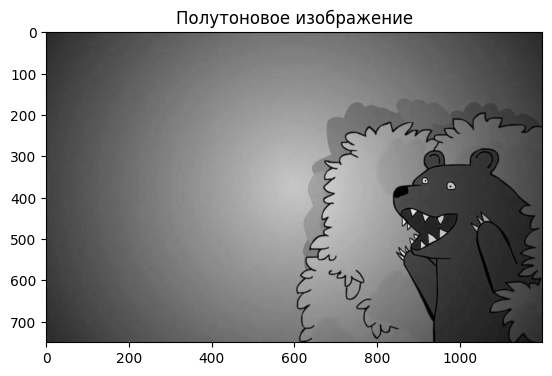

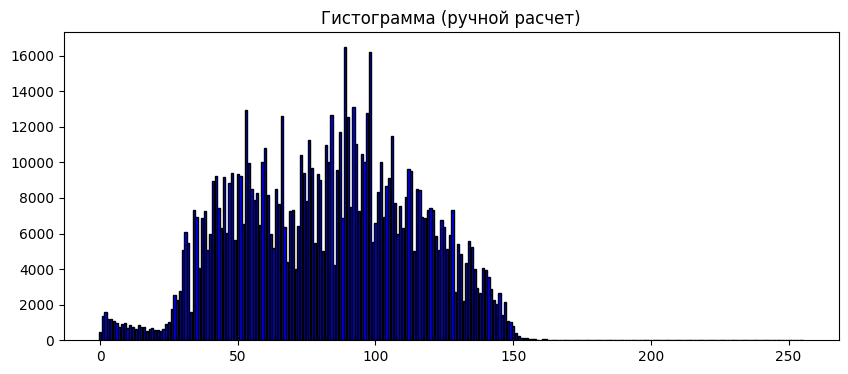

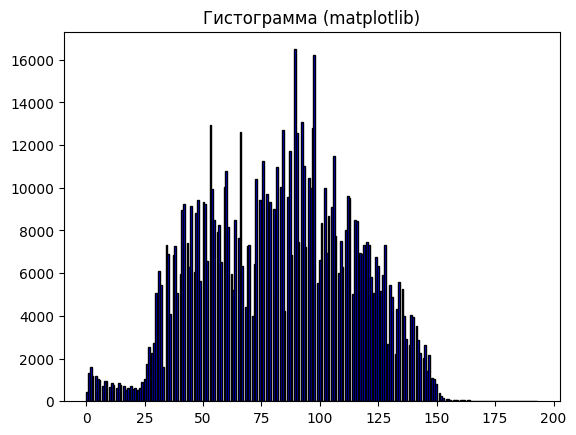

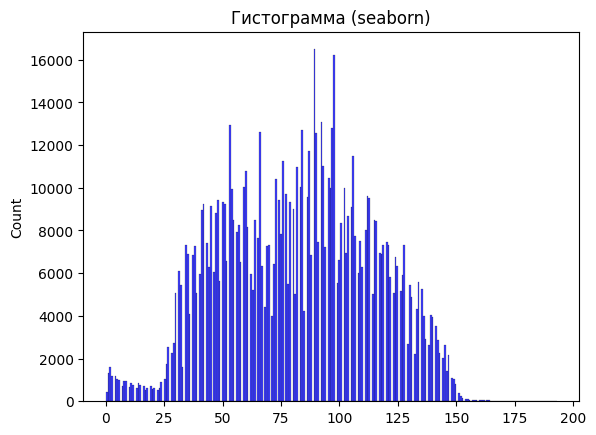

Математическое ожидание (NumPy): 82.26646777777778, (Ручной расчет): 82.26646777777778
Дисперсия (NumPy): 1037.7415982567397, (Ручной расчет): 1037.7415982567397


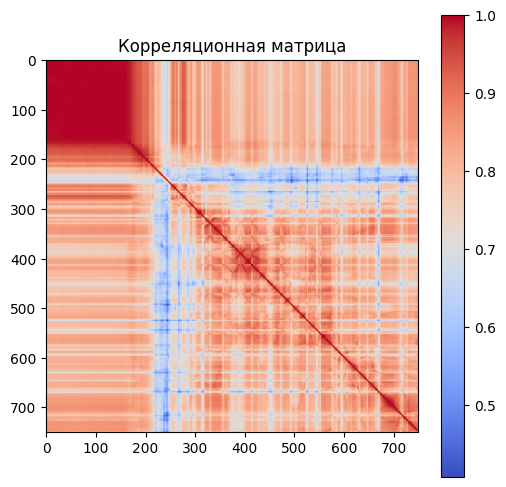

Радиус корреляции: 530.33


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

# Обновленная функция load_image
def load_image(filename=None):
    if filename is None:
        print("Пожалуйста, укажите файл изображения.")
        return None
    
    # Загрузка изображения
    image = cv.imread(filename)
    if image is None:
        print("Ошибка загрузки изображения")
        return None
    
    # Определение типа изображения
    def is_color_image(img):
        return img.shape[2] == 3 if len(img.shape) == 3 else False

    print("Тип изображения:", "Полноцветное" if is_color_image(image) else "Полутоновое")

    # Преобразование в полутоновое изображение
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    image_double = np.double(image_gray)
    plt.imshow(image_gray, cmap="gray")
    plt.title("Полутоновое изображение")
    plt.show()

    # Задание 5: Построение гистограммы тремя способами
    # 1. Вручную
    hist_manual = np.zeros(256)
    for i in range(image_gray.shape[0]):
        for j in range(image_gray.shape[1]):
            hist_manual[image_gray[i, j]] += 1

    plt.figure(figsize=(10, 4))
    plt.bar(range(256), hist_manual, color="blue", edgecolor="black")
    plt.title("Гистограмма (ручной расчет)")
    plt.show()

    # 2. С помощью matplotlib
    plt.hist(image_gray.ravel(), bins=256, color="blue", edgecolor="black")
    plt.title("Гистограмма (matplotlib)")
    plt.show()

    # 3. С помощью seaborn
    sns.histplot(image_gray.ravel(), bins=256, kde=False, color="blue")
    plt.title("Гистограмма (seaborn)")
    plt.show()

    # Задание 6: Вычисление математического ожидания и дисперсии
    mean_np = np.mean(image_gray)
    var_np = np.var(image_gray)

    # Математическое ожидание и дисперсия по формуле
    mean_manual = np.sum(image_gray) / (image_gray.shape[0] * image_gray.shape[1])
    var_manual = np.sum((image_gray - mean_manual) ** 2) / (image_gray.shape[0] * image_gray.shape[1])

    print(f"Математическое ожидание (NumPy): {mean_np}, (Ручной расчет): {mean_manual}")
    print(f"Дисперсия (NumPy): {var_np}, (Ручной расчет): {var_manual}")

    # Задание 7: Вычисление корреляционной матрицы
    # Нормализация изображения
    img_normalized = image_gray / 255.0

    def calculate_correlation_matrix(img):
        mean_img = np.mean(img)
        img_centered = img - mean_img
        correlation_matrix = np.corrcoef(img_centered)
        return correlation_matrix

    correlation_matrix = calculate_correlation_matrix(img_normalized)

    # Визуализация корреляционной матрицы
    plt.figure(figsize=(6, 6))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.title("Корреляционная матрица")
    plt.show()

    # Задание 8: Вычисление радиуса корреляции
    threshold = 0.5
    y_center, x_center = np.array(correlation_matrix.shape) // 2
    radius_correlation = 0

    for y in range(correlation_matrix.shape[0]):
        for x in range(correlation_matrix.shape[1]):
            distance = np.sqrt((y - y_center)**2 + (x - x_center)**2)
            if correlation_matrix[y, x] > threshold and distance > radius_correlation:
                radius_correlation = distance

    print(f"Радиус корреляции: {radius_correlation:.2f}")

    # Возвращаем изображение для дальнейшего использования при необходимости
    return image

# Использование функции
image_path = "img.png"
img = load_image(image_path)


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Загрузка изображения в полутоновом формате
image_path = "img.png"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Нормализация изображения (приведение к диапазону [0, 1])
image = image / 255.0

# Функция для расчета ковариационной функции
import numpy as np

def calculate_covariance_function(img):
    h, w = img.shape
    mean_img = np.mean(img)
    covariance_function = np.zeros((2 * h - 1, 2 * w - 1))

    for dy in range(-h + 1, h):
        for dx in range(-w + 1, w):
            # Вычисление смещенных индексов
            Ni = h - abs(dy)
            Nj = w - abs(dx)

            # Инициализация суммы ковариации
            covariance_sum = 0
            
            for i in range(max(0, -dy), min(h, h - dy)):
                for j in range(max(0, -dx), min(w, w - dx)):
                    # Убедимся, что мы остаемся в пределах изображения
                    if 0 <= i + dy < h and 0 <= j + dx < w:
                        covariance_sum += (img[i, j] - mean_img) * (img[i + dy, j + dx] - mean_img)
            # Вычисление K(dy, dx) по формуле
            covariance_function[dy + h - 1, dx + w - 1] = covariance_sum / (Ni * Nj)

    return covariance_function


# Расчет ковариационной функции
covariance_function = calculate_covariance_function(image)


In [ ]:

# Создание сетки для 3D-графика
y = np.arange(-image.shape[0] + 1, image.shape[0])
x = np.arange(-image.shape[1] + 1, image.shape[1])
X, Y = np.meshgrid(x, y)

# Визуализация ковариационной функции в виде 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, covariance_function, cmap='viridis')

ax.set_title("Ковариационная функция изображения")
ax.set_xlabel("Смещение по X")
ax.set_ylabel("Смещение по Y")
ax.set_zlabel("Ковариация")
plt.show()

In [ ]:
# Радиус корреляции
correlation_radius = np.sum(cov_matrix) / (cov_matrix.shape[0] * cov_matrix.shape[1])
print("Радиус корреляции:", correlation_radius)

In [ ]:
a = 3 + 4
a